In [4]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm  import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**DATA PREPROCESSING**

In [6]:
print(df.info(),"\n")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None 

(1025, 14)


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
print(df.isna().sum(),"\n")
print(df.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 

(1025, 14)


In [9]:
#checking the duplicated values
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
data = df.drop_duplicates()

In [11]:
data.shape

(302, 14)

In [12]:
#There are too many duplicate values present in this dataset , however we cannot drop all these duplicated value
#s because our data will be then very samall, and hereby we will do our operations fir the first orignal dataframe = df

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

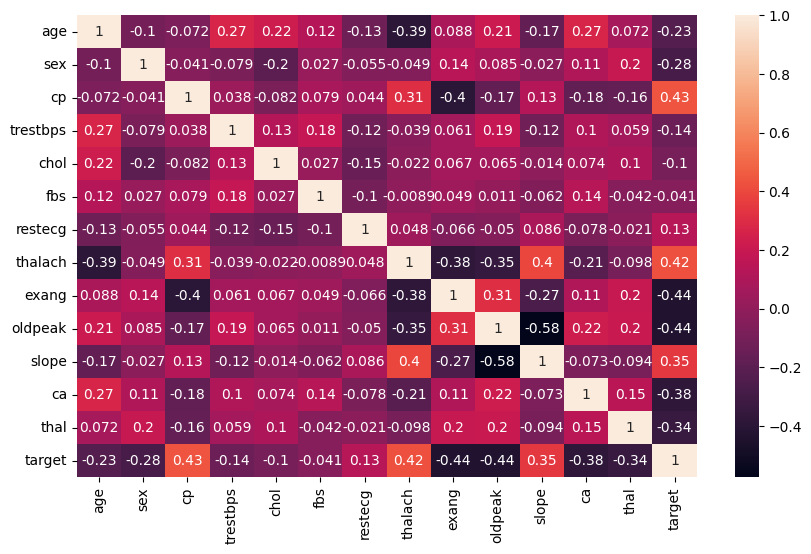

In [14]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)


<Axes: xlabel='age', ylabel='Density'>

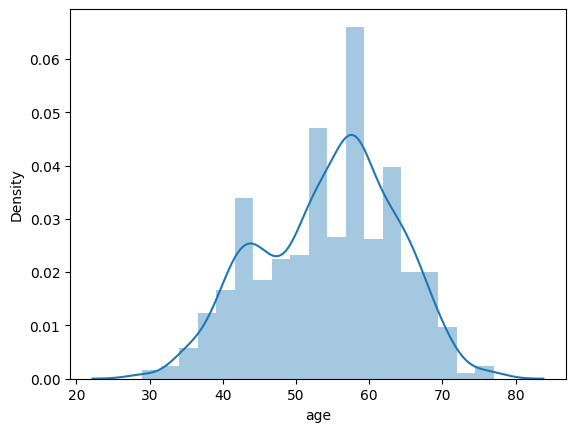

In [15]:
#To show the distribution of the data
sns.distplot(df["age"])


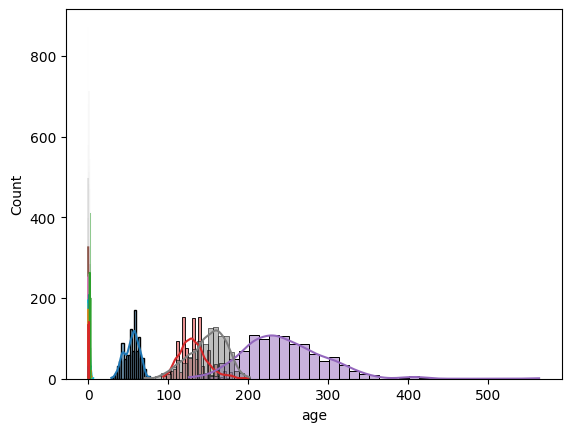

In [16]:
#To see distribution of all the columns -->

for i in df.columns:
  sns.histplot(df[i],kde = True)




{'whiskers': [<matplotlib.lines.Line2D at 0x7e3ac133a110>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3ac133a650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3ac1339e70>,
 'medians': [<matplotlib.lines.Line2D at 0x7e3ac50d3b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e3ac1437700>,
 'means': []}

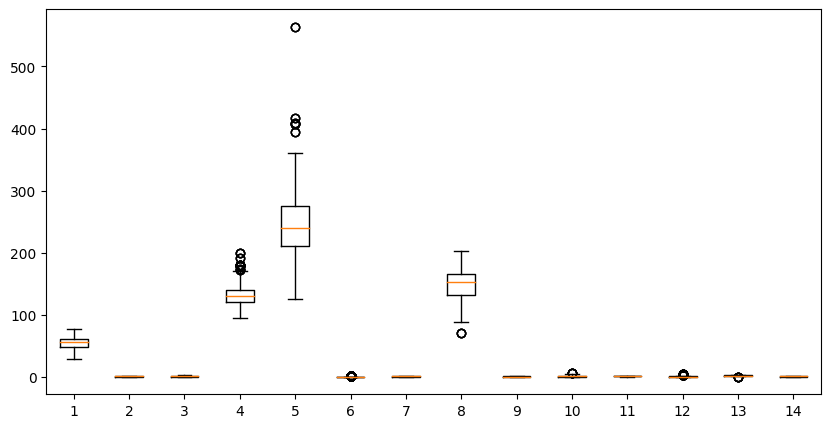

In [17]:
plt.figure(figsize=(10,5))
plt.boxplot(df) #To see outliers with help of box plot.

In [18]:

#Now spliiting the dependent and independent variable -->
x = df.iloc[:,:-1] # independent variable
y = df.iloc[:,-1] # dependent variable


In [19]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [21]:
#Further splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [22]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
773,65,0,0,150,225,0,0,114,0,1.0,1,3,3
486,41,1,0,110,172,0,0,158,0,0.0,2,0,3
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
885,57,1,0,165,289,1,0,124,0,1.0,1,3,3
790,54,1,0,110,239,0,1,126,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,56,1,1,120,240,0,1,169,0,0.0,0,0,2
780,44,1,0,120,169,0,1,144,1,2.8,0,0,1
922,44,1,1,120,263,0,1,173,0,0.0,2,0,3
306,44,0,2,118,242,0,1,149,0,0.3,1,1,2


In [23]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
82,46,1,2,150,231,0,1,147,0,3.6,1,0,2
550,69,1,2,140,254,0,0,146,0,2.0,1,3,3
763,58,0,3,150,283,1,0,162,0,1.0,2,0,2
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2
251,45,0,1,112,160,0,1,138,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,55,0,0,128,205,0,2,130,1,2.0,1,1,3
724,74,0,1,120,269,0,0,121,1,0.2,2,1,2
134,54,1,1,108,309,0,1,156,0,0.0,2,0,3
912,35,1,0,120,198,0,1,130,1,1.6,1,0,3


In [24]:
# Making a pipeline for handling missing values and standardising the data
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # for handling missing values
from sklearn.preprocessing import StandardScaler # for standardisation

In [25]:
preprocessor = Pipeline(
        steps= [
            ('imputer',SimpleImputer(strategy='median')),
            ('scaler',StandardScaler())
        ]

)

In [26]:
#Scaling the data
x_train = preprocessor.fit_transform(x_train)

In [27]:
x_train

array([[ 1.18742395, -1.50554531, -0.95183712, ..., -0.64001014,
         2.29623892,  1.12230323],
       [-1.46302994,  0.66421116, -0.95183712, ...,  0.99213468,
        -0.72528262,  1.12230323],
       [-0.91085205,  0.66421116, -0.95183712, ...,  0.99213468,
        -0.72528262,  1.12230323],
       ...,
       [-1.1317232 ,  0.66421116,  0.01838616, ...,  0.99213468,
        -0.72528262,  1.12230323],
       [-1.1317232 , -1.50554531,  0.98860943, ..., -0.64001014,
         0.28189122, -0.49174293],
       [ 0.4143749 ,  0.66421116, -0.95183712, ..., -0.64001014,
         0.28189122,  1.12230323]])

In [28]:
x_test = preprocessor.transform(x_test)

In [29]:
x_test

array([[-0.91085205,  0.66421116,  0.98860943, ..., -0.64001014,
        -0.72528262, -0.49174293],
       [ 1.62916626,  0.66421116,  0.98860943, ..., -0.64001014,
         2.29623892,  1.12230323],
       [ 0.4143749 , -1.50554531,  1.9588327 , ...,  0.99213468,
        -0.72528262, -0.49174293],
       ...,
       [-0.02736742,  0.66421116,  0.01838616, ...,  0.99213468,
        -0.72528262,  1.12230323],
       [-2.12564341,  0.66421116, -0.95183712, ..., -0.64001014,
        -0.72528262,  1.12230323],
       [ 0.4143749 ,  0.66421116,  0.98860943, ..., -0.64001014,
        -0.72528262,  1.12230323]])

**IMPLIMENTING THE MODEL**

In [30]:
#importing the models and evaluating them
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

**KNN**

In [31]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [32]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

**DECISION TREE**

In [33]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [34]:
y_pred1 = decision_tree.predict(x_test)
y_pred1

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.467\ngini = 0.499\nsamples = 686\nvalue = [329, 357]'),
 Text(0.25, 0.5, 'x[11] <= -0.222\ngini = 0.36\nsamples = 319\nvalue = [244, 75]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 140\nvalue = [70, 70]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.054\nsamples = 179\nvalue = [174, 5]'),
 Text(0.75, 0.5, 'x[0] <= 0.249\ngini = 0.356\nsamples = 367\nvalue = [85, 282]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.17\nsamples = 224\nvalue = [21, 203]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.494\nsamples = 143\nvalue = [64, 79]')]

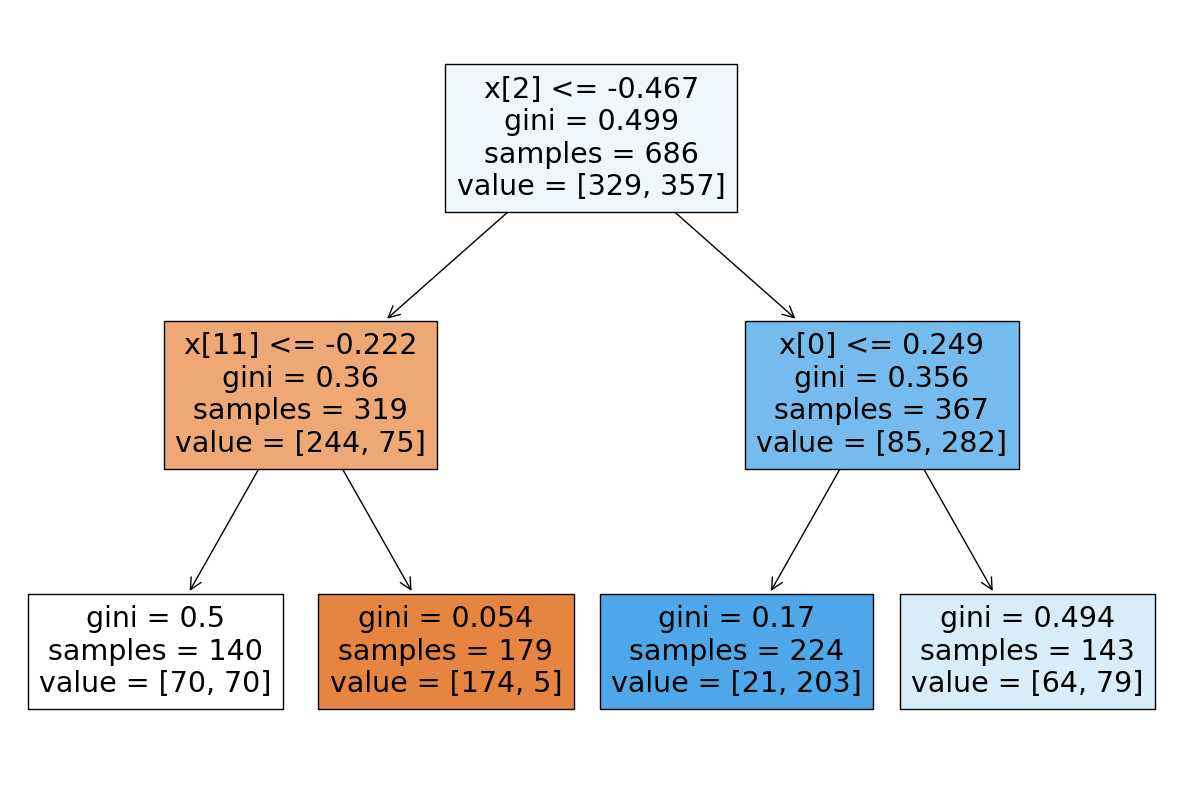

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled = True)

**NAIVE BAYES**

In [36]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [37]:
y_pred2 =naive_bayes.predict(x_test)
y_pred2

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

**EVALUATING MODEL**

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
models={
    'KNN' : KNeighborsClassifier(n_neighbors=5,algorithm='auto'),
    'Decision tree' : DecisionTreeClassifier(max_depth=2),
    'Naive Bayes' : GaussianNB()
}

In [40]:
def evaluate_model(x_train,y_train,x_test,y_test,models):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        #train model
        model.fit(x_train,y_train)

        # predict
        y_test_pred = model.predict(x_test)
        # get accuracy score
        test_model_score = accuracy_score(y_test,y_test_pred)
        report[list(models.keys())[i]] = test_model_score


    return report

In [41]:
#Now comparing accuracies of different models
evaluate_model(x_train,y_train,x_test,y_test,models)

{'KNN': 0.855457227138643,
 'Decision tree': 0.7463126843657817,
 'Naive Bayes': 0.8171091445427728}

In [42]:
#implementing other evaluation techniques  -->
from sklearn.metrics import confusion_matrix,classification_report

**KNN**

In [43]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[151  30]
 [ 19 139]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       181
           1       0.82      0.88      0.85       158

    accuracy                           0.86       339
   macro avg       0.86      0.86      0.86       339
weighted avg       0.86      0.86      0.86       339



**DECISION TREE**

In [44]:
print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

[[131  47]
 [ 39 122]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       178
           1       0.72      0.76      0.74       161

    accuracy                           0.75       339
   macro avg       0.75      0.75      0.75       339
weighted avg       0.75      0.75      0.75       339



**NAIVE BAYES**

In [45]:
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

[[137  29]
 [ 33 140]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       166
           1       0.83      0.81      0.82       173

    accuracy                           0.82       339
   macro avg       0.82      0.82      0.82       339
weighted avg       0.82      0.82      0.82       339



****

**CHECK OVERFITTING (KNN)**

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_train_pred = knn.predict(x_train)
print(accuracy_score(y_train_pred,y_train))
y_test_pred = knn.predict(x_test)
print(accuracy_score(y_test_pred,y_test))

0.9446064139941691
0.855457227138643


**DECISION TREE**

In [48]:
decision_tree.fit(x_train,y_train)
y_train_pred_decision = decision_tree.predict(x_train)
print(accuracy_score(y_train_pred_decision,y_train))
y_test_pred_decision = decision_tree.predict(x_test)
print(accuracy_score(y_test_pred_decision,y_test))

0.7667638483965015
0.7463126843657817


**NAIVE BAYES**

In [49]:
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [50]:
y_train_pred_nb = naive_bayes.predict(x_train)
print(accuracy_score(y_train_pred_nb,y_train))
y_test_pred_nb = naive_bayes.predict(x_test)
print(accuracy_score(y_test_pred_nb,y_test))

0.8294460641399417
0.8171091445427728


In [51]:
#From this we get that our KNN model is overfitted and accuracy of decision tree model is very low
#and naive bayes model's accuracy is also low. So, we'll  perform hyperparameter tuning to overcome the overfitting and increase their accuracies.



**Hyperparameter Tuning or Cross Validation(KNN)**

In [52]:
k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)

In [53]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

In [54]:
grid = GridSearchCV(knn, param_grid= parameters, cv=10, scoring='accuracy')

In [55]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [56]:
grid.best_params_

{'n_neighbors': 1}

In [57]:
y_predict_cv = grid.predict(x_test)
y_predict_cv


array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

**DECISION TREE**

In [58]:
parameters1 = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [59]:
tree_classifier = DecisionTreeClassifier()

In [60]:
decision_cv = GridSearchCV(tree_classifier,param_grid=parameters1,cv=10,scoring='accuracy')


In [61]:
decision_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [62]:
y_predict_DecisionCV = decision_cv.predict(x_test)
y_predict_DecisionCV


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

**NAIVE BAYES**

In [63]:
parameters2 = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [64]:
naive_bayes_cv = GaussianNB()

In [65]:
naive_bayesCV = GridSearchCV(naive_bayes_cv,param_grid=parameters2,cv=10,scoring='accuracy')

In [66]:
naive_bayesCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [67]:
y_predict_naiveCV = naive_bayesCV.predict(x_test)

In [68]:
y_predict_naiveCV

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

**ACCURACY AFTER CROSS VALIDATION(KNN)**

In [69]:
print(accuracy_score(y_predict_cv,y_test))
print(confusion_matrix(y_predict_cv,y_test))
print(classification_report(y_predict_cv,y_test))

0.9911504424778761
[[170   3]
 [  0 166]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       173
           1       0.98      1.00      0.99       166

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339



**DECISION TREE**

In [70]:
print(accuracy_score(y_predict_DecisionCV,y_test))
print(classification_report(y_predict_DecisionCV,y_test))
print(confusion_matrix(y_predict_DecisionCV,y_test))

0.8525073746312685
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       162
           1       0.88      0.84      0.86       177

    accuracy                           0.85       339
   macro avg       0.85      0.85      0.85       339
weighted avg       0.85      0.85      0.85       339

[[141  21]
 [ 29 148]]


**NAIVE BAYES**

In [71]:
print(accuracy_score(y_predict_naiveCV,y_test))
print(confusion_matrix(y_predict_naiveCV,y_test))
print(classification_report(y_predict_naiveCV,y_test))

0.8259587020648967
[[136  25]
 [ 34 144]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       161
           1       0.85      0.81      0.83       178

    accuracy                           0.83       339
   macro avg       0.83      0.83      0.83       339
weighted avg       0.83      0.83      0.83       339



In [72]:
#The accuracies of model are increased.